<a href="https://colab.research.google.com/github/marcozarate/ArcSDM/blob/master/Copia_de_API_GBIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: instala pandas y geopandas

!pip install pandas
!pip install geopandas


In [ ]:
!pip install requests

import requests # Importing the 'requests' library

import pandas as pd, geopandas as gpd

In [ ]:
import pandas as pd, geopandas as gpd

In [ ]:
def get_gbif_species_data(species_name, country_code):
    """
    Retrieves observational data for a specific species using the GBIF API and returns it as a pandas DataFrame.

    Parameters:
    species_name (str): The scientific name of the species to query.
    country_code (str): The country code where the observation data will be queried.

    Returns:
    pd.DataFrame: A pandas DataFrame containing the observational data.
    """

    base_url = "https://api.gbif.org/v1/occurrence/search"
    params = {
        "scientificName": species_name,
        "country": country_code,
        "hasCoordinate": "true",
        "basisOfRecord": "HUMAN_OBSERVATION",
        "limit": 10000,
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Check for HTTP request errors
        data = response.json()
        occurrences = data.get("results", [])

        if occurrences:  # If data is present
            df = pd.json_normalize(occurrences)
            return df
        else:
            print("No data found for the given species and country code.")
            return pd.DataFrame()  # Returns an empty DataFrame

    except requests.RequestException as e:
        print(f"Request failed: {e}")
        return pd.DataFrame()  # Returns an empty DataFrame in case of an exception

In [ ]:
# Obtener datos del armadillo gigante (Priodontes maximus) en Brasil
df = get_gbif_species_data("Priodontes maximus", "BR")  # "BR" es el código ISO de Brasil

df.to_csv("Priodontes_maximus_BR.csv", index=False)
df = pd.read_csv("Priodontes_maximus_BR.csv")

df.head(1)


,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,projectId,lifeStage,individualCount,eventID,acceptedNameUsage,vernacularName,locality,associatedReferences,parentEventID,type
0,5154923183,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2025-08-02T12:45:50.757+00:00,2025-08-03T02:50:53.978+00:00,555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar el CSV
df = pd.read_csv("Priodontes_maximus_BR.csv")

# Filtrar registros válidos con coordenadas
df = df.dropna(subset=["decimalLatitude", "decimalLongitude"])

# Crear columna de geometría con puntos
geometry = [Point(xy) for xy in zip(df["decimalLongitude"], df["decimalLatitude"])]

# Crear GeoDataFrame con CRS WGS84 (EPSG:4326)
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Exportar a shapefile
gdf.to_file("Priodontes_maximus_BR.shp", driver="ESRI Shapefile")


/tmp/ipython-input-781099734.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("Priodontes_maximus_BR.shp", driver="ESRI Shapefile")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'publishingOrgKey' to 'publishing'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'installationKey' to 'installati'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'hostingOrganizationKey' to 'hostingOrg'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'publishingCountry' to 'publishi_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'lastCrawled' to 'lastCrawle'
  ogr_write(
/usr/local

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar CSV
df = pd.read_csv("Priodontes_maximus_BR.csv")

# Filtrar coordenadas válidas
df = df.dropna(subset=["decimalLatitude", "decimalLongitude"])

# Crear geometría
geometry = [Point(xy) for xy in zip(df["decimalLongitude"], df["decimalLatitude"])]

# GeoDataFrame con CRS EPSG:4326
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Exportar a carpeta
gdf.to_file("shapefile_priodontes", driver="ESRI Shapefile")


/tmp/ipython-input-620568470.py:18: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("shapefile_priodontes", driver="ESRI Shapefile")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'publishingOrgKey' to 'publishing'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'installationKey' to 'installati'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'hostingOrganizationKey' to 'hostingOrg'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'publishingCountry' to 'publishi_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'lastCrawled' to 'lastCrawle'
  ogr_write(
/usr/local/lib/

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
import zipfile

# Nombre base
species_name = "Priodontes_maximus_BR"

# 1. Leer el CSV
df = pd.read_csv(f"{species_name}.csv")

# 2. Filtrar registros con coordenadas válidas
df = df.dropna(subset=["decimalLatitude", "decimalLongitude"])

# 3. Crear geometría (puntos)
geometry = [Point(xy) for xy in zip(df["decimalLongitude"], df["decimalLatitude"])]

# 4. Crear GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# 5. Crear carpeta temporal para guardar el shapefile
output_folder = species_name + "_shp"
os.makedirs(output_folder, exist_ok=True)

# 6. Exportar a shapefile
shapefile_path = os.path.join(output_folder, species_name + ".shp")
gdf.to_file(shapefile_path, driver="ESRI Shapefile")

# 7. Comprimir todos los archivos del shapefile en un .zip
zip_filename = species_name + ".zip"
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for file in os.listdir(output_folder):
        file_path = os.path.join(output_folder, file)
        zipf.write(file_path, arcname=file)

# 8. Limpieza opcional: eliminar carpeta temporal si no la necesitas
# import shutil
# shutil.rmtree(output_folder)

print(f"✅ Shapefile exportado en: {zip_filename}")


✅ Shapefile exportado en: Priodontes_maximus_BR.zip


/tmp/ipython-input-745010673.py:28: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(shapefile_path, driver="ESRI Shapefile")
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'publishingOrgKey' to 'publishing'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'installationKey' to 'installati'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'hostingOrganizationKey' to 'hostingOrg'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'publishingCountry' to 'publishi_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'lastCrawled' to 'lastCrawle'
  ogr_write(
/usr/local/lib/python3.

The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,168 kB of archives.
After this operation, 25.6 MB of additional disk space will be used.
Selecting previously unselected package python3-numpy.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.21.5-1ubuntu22.04.1_amd64.deb ...
Unpacking python3-numpy (1:1.21.5-1ubuntu22.04.1) ...
Selecting previously unselected package python3-gdal.
Preparing to unpack .../python3-gdal_3.8.4+dfsg-1~jammy0_amd64.deb ...
Unpacking python3-gdal (3.8.4+dfsg-1~jammy0) ...
Selecting previously unselected package gdal-bin.
Preparing to unpack .../gdal-bin_3.8.4+dfsg-1~jammy0_amd64.deb ...
Unpacking gdal-bin (3.8.4+dfsg-1~jammy0) ...
Set

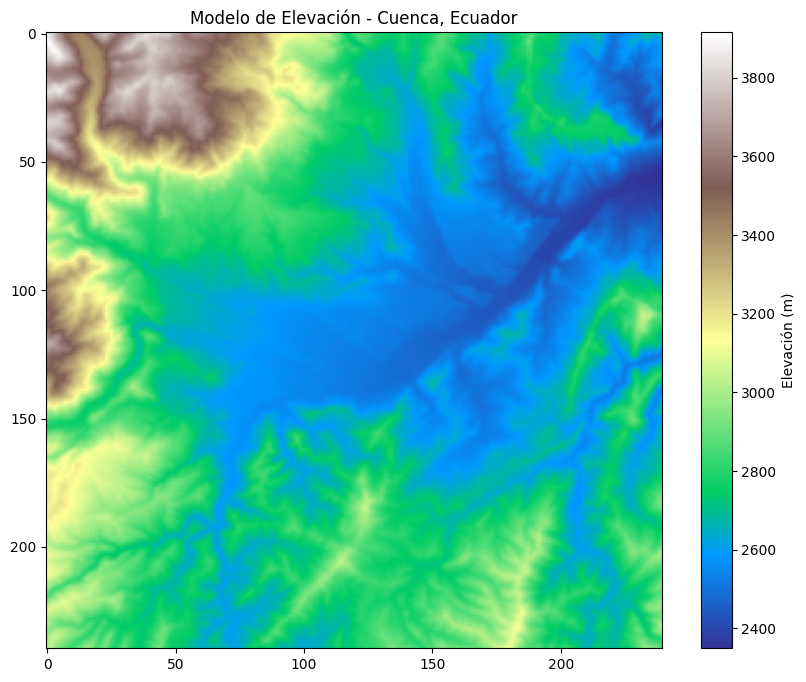

In [ ]:
# Instalar dependencias si es necesario
!apt install -qq gdal-bin
!pip install requests rasterio

import requests
import matplotlib.pyplot as plt
import numpy as np
from rasterio.io import MemoryFile

# 🔑 API Key de OpenTopography
api_key = 'a81475691c160b50afad42fb14df17b2'  # Puedes usar esta de ejemplo, o poner la tuya si tienes una.

# 📍 Coordenadas de Cuenca, Ecuador
latitude = -2.90055
longitude = -79.00453

# ⚙️ Define el tamaño del área (en grados)
delta = 0.1  # ~22km por lado. Puedes ajustarlo.

# 📤 Parámetros para la API
params = {
    'demtype': 'SRTMGL3',            # Modelo SRTM 90m
    'south': latitude - delta,
    'north': latitude + delta,
    'west': longitude - delta,
    'east': longitude + delta,
    'outputFormat': 'GTiff',
    'API_Key': api_key
}

# 🌐 URL del endpoint
url = "https://portal.opentopography.org/API/globaldem"

# 🚀 Hacer la solicitud
response = requests.get(url, params=params)

# ✅ Verifica el resultado
if response.status_code == 200:
    print("✅ Descarga exitosa del DEM")
else:
    print(f"❌ Error {response.status_code}: {response.text}")

# 💾 Guardar como GeoTIFF
with open('cuenca_dem.tif', 'wb') as f:
    f.write(response.content)
print("🗺️ Archivo guardado como 'cuenca_dem.tif'")

# 📈 Visualizar el DEM
with MemoryFile(response.content) as memfile:
    with memfile.open() as dataset:
        elevation_data = dataset.read(1)
        plt.figure(figsize=(10, 8))
        plt.imshow(elevation_data, cmap='terrain')
        plt.colorbar(label='Elevación (m)')
        plt.title('Modelo de Elevación - Cuenca, Ecuador')
        plt.show()
